# **Scope Mux and Signal Conditioning**


```
SSCS TC-OSE Team, April 2023

```
**List of Supervisors**<br>
<table>

|Project Supervisor|Email|Affiliation|
|:--:|:--:|:--:|
|Dr. Rashad Ramzan |rashad.ramzan@nu.edu.pk|Fast National University, Islamabad|
|Dr. Hassan Saif |hassan.saif@nu.edu.pk|Fast National University, Islamabad|
|Engr. Hamza Atiq |hmz1075@gmail.com|Fast National University, Islamabad|<br>
</table>

**List of Authors**<br>
<table>

|Name|Email|Affiliation|
|:--:|:--:|:----------:|
|Mubeen Yousaf (Team Lead)|i229928@nu.edu.pk|Fast National University, Islamabad |
|Hamza Sadiq|i229931@nu.edu.pk|Fast National University, Islamabad|
|Muhammad Hayat|i229932@nu.edu.pk|Fast National University, Islamabad |
|Muhammad Bilal|i229926@nu.edu.pk|Fast National University, Islamabad |

</table>

##**Abstract**  
The proposed design aims to develop different blocks for scope multiplexer and signal conditioning unit, which is an integral part of Analog Discovery (Lab Bench on Chip). The proposed design recieves input from eight differential channels and a multiplexer selects one channel followed by a current sensor/buffer (depending upon input type). The next stage is a programmable gain amplifier followed by an ADC driver which is implemented using the folded cascode opamp, a component known for its high gain and bandwidth. The design has been implemented on the Cadence 130nm node, achieving a bandwidth of 6.52MHz at 0.5dB flatness for unity gain.ADC driver stage has also been implemented on Xschem. The next step involves mapping the whole design onto open-source tools (Xschem, Magic) to ensure all requirements are met. <br> 
**_Key words:_** Programmable Gain Amplifier(PGA), Transmission Gate(TG)


##**Motivation**
The idea of “Lab bench on Chip” is proposed which is inspired by the Analog Discovery. It is divided into six blocks. Design is proposed for one of the block  known as Input Mux and Signal Conditioning. The previous experience with PDKs such as 65nm and 130nm on Cadence can be leveraged to generate innovative solutions utilizing open-source tools.

##**Problem Statement**
Design of Input MUX for on chip oscilloscope that allows the macro's user to switch the ADC resources to a number of different test points within the DUT. It is desirable to have the MUX work for rail-to-rail inputs. The signal conditioning circuitry should have a small input capacitance and essentially "infinite" input resistance. On the output side, there must be significant drive strength to handle the high-speed ADCs and deal with their charge kickback (if applicable). A plus for signal conditioning block would be to include transimpedance stages for current measurements. 

<center>

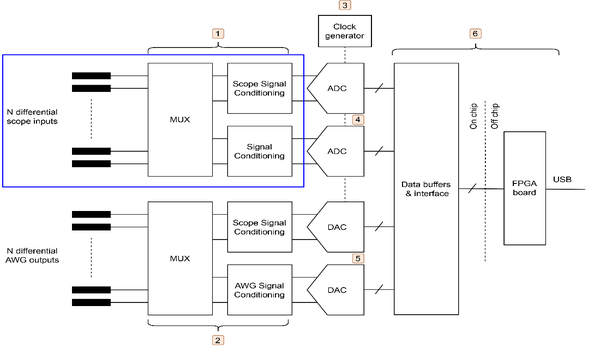

</center>

##**Target Specifications**
<center>

**Table 1:** Target Specifications
<table>

|Specification|Target|
|:--:|:--:|
|Scope Input Capacitance|&lt; 5pF|
|No of Differential Input Channels|&ge; 8|
|Programmable Gain|0.25, 0.5, 1, 2, 4, 8|
|Bandwidth|Maximize|
|Noise|&lt; 0.5 LSB<sub>rms</sub>|

</table>
</center>

##**Proposed Design**
The proposed design has four blocks:
1.	Input Mux (8x1)
2.	Transimpedance Stage (for Current Measurement)
3.	Programmable Gain Block
4.	ADC Driver

###**Block Diagram**
<center>

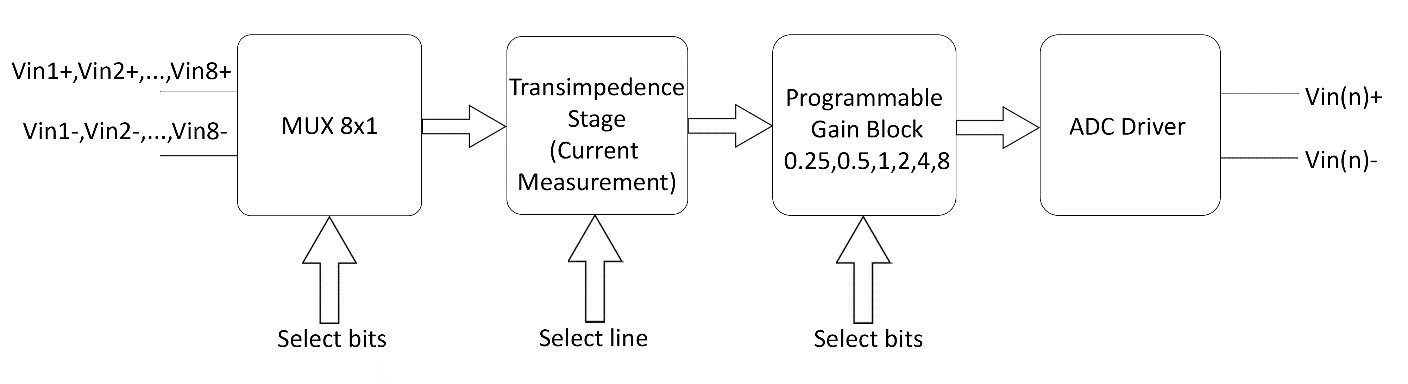

</center>

###**_1.	Mux Selection block_**  
Input Mux selection block will select one differential input from eight available input channels so we need 8x1 analog mux which should have &lt;5pF input capacitance and good isolation between different inputs.  The basic building block of analog mux is transmission gate (TG) which works for rail-to-rail inputs. There is one limitation that any input greater than V<sub>TH</sub>+V<sub>DD</sub> will turn on the PMOS in analog transmission gate which will ruin the operation.The design of 2x1 analog mux is given in [1]. By implementing same topology, an 8x1 Mux was designed as shown in Figure 2. The important factor to consider in designing is that “R<sub>ON</sub>” of PMOS and NMOS is different for same size of transistors due to different mobility of holes and electrons. To select one channel from eight available channels, three selection bits will be provided from digital interface block to select the desired channel. The size of NMOS and PMOS is 20µ and 50µ respectively and it uses the break-before-make switching action. To find the resistance of the mux block, the testbench setup shown in Figure 3 was used.

<center>


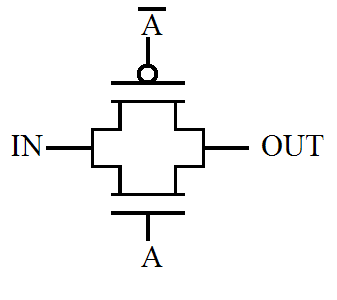

**Figure 1:** Analog Transmission Gate
</center>

<center>

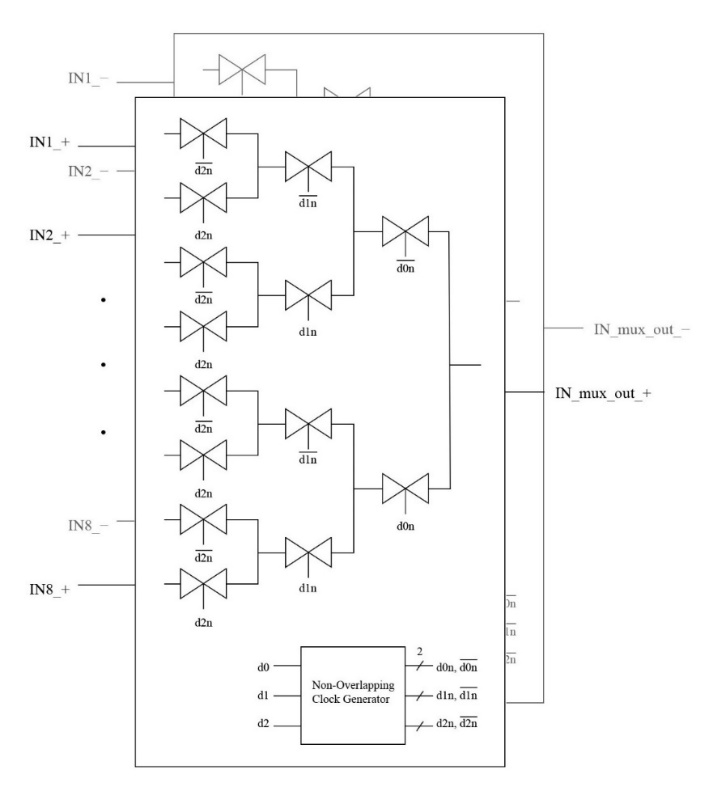


**Figure 2:** Analog 8 x 1 MUX

</center>

Following figure shows a testbench schematic for the measurement of 8x1 mux resistance. In this schematic nets **A**, **B** and **C** are select lines and **V<sub>DD</sub>** and **V<sub>SS</sub>** are power supplies. Input and output nets are named as **in** and **out**.

<center>


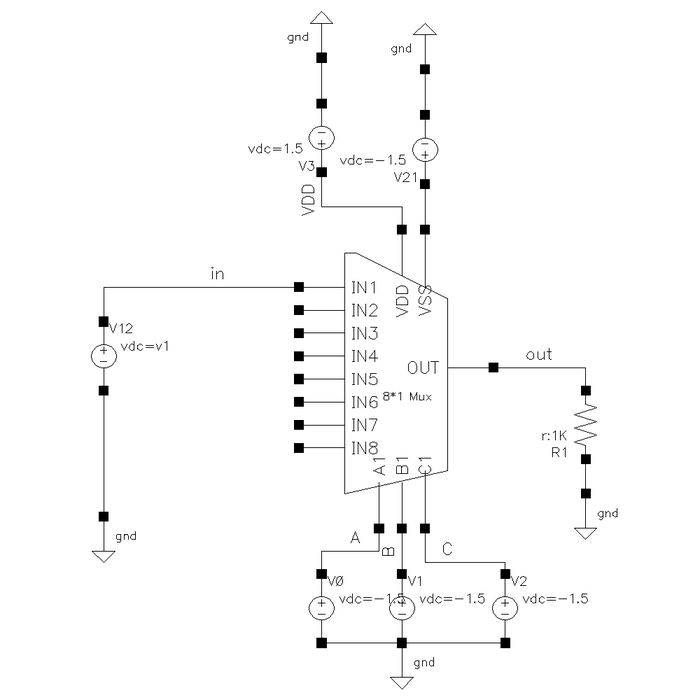


**Figure 3:** Testbench Setup for Finding Resistance of 8 x 1 MUX

</center>

The resistance graph from input to output is given in figure below. In this plot the x-axis shows the value of input voltage while the y-axis shows the value of resistance of single channel of mux. The maximum value was 425.7&ohm; while the minimum was 197.6&ohm;.
<center>


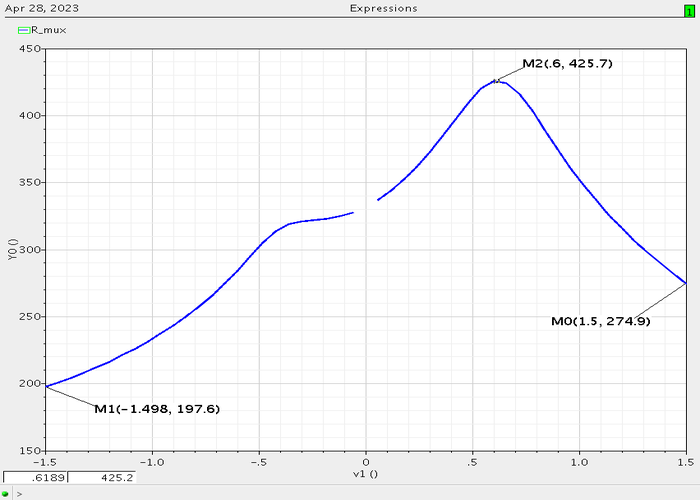


**Figure 4:** Resistance Plot of 8 x 1 MUX

</center>

Simulation setup of Mux Block is given in following figure. In this figure nets named from **IN1** to **IN8** are 8 different inputs and **OUT** is output port. **A**, **B** and **C** are select lines to select one input from 8 available inputs while **V<sub>DD</sub>** and **V<sub>SS</sub>** are power supplies.
<center>

<image>

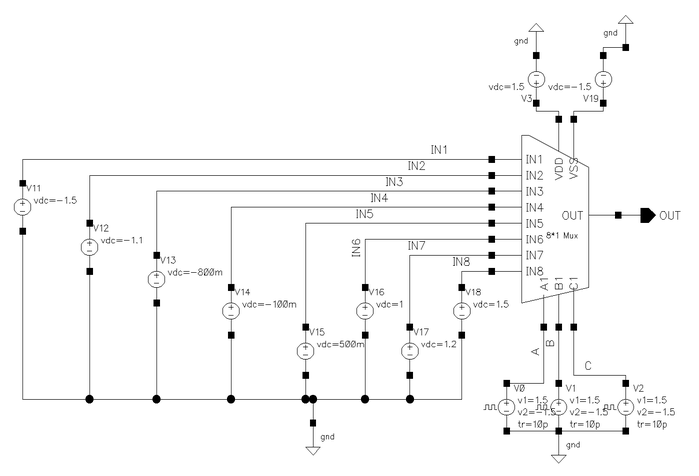

</image>

**Figure 5:** Testbench Setup for Simulation of 8 x 1 MUX

</center>

The simulation results of testbench setup shown in Figure 5 are given in Figure 6. In this figure the 1<sup>st</sup> three waveforms are select lines which will be provided from digital interface and the last waveform is the output of mux. It can be seen that when the select line value changes the output of mux also changes to another value. The x-axis shows the transient time of simulation while the y-axis shows the value of voltage.
<center>
<image>

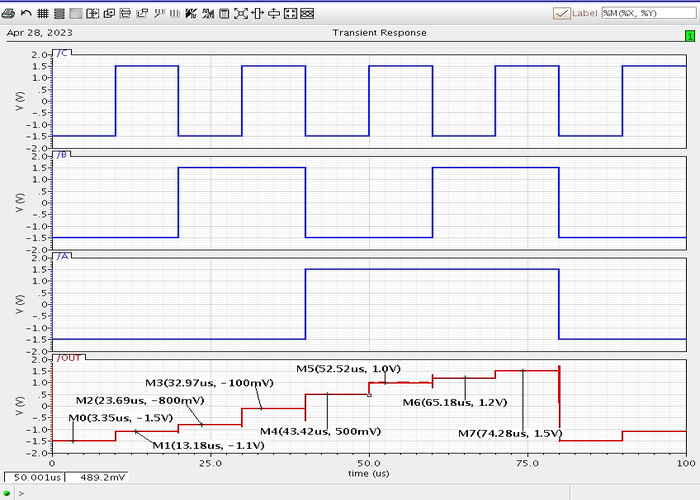
</image>

**Figure 6:** Simulation Results of 8 x 1 MUX
</center>

<center>

**Table 2:** Mux Block Features 

<table>

  |Name|Value|
|:|:|
|Resistance|350 &ohm;|
|Capacitance|1 pF|
|BW @ 0.1dB|107.6 MHz|
|Output Swing|Rail to Rail| 
</table>
</center>



###**2. Trans-Impedance Stage**  
This stage will select between voltage and current signals to be measured. By selecting the bit, input will either be connected to transimpedance stage or it will be multiplied by gain of -1 (ADC driver stage is also inverted that’s why  gain of -1 is used at this stage). This stage has been implemented by the following block diagram. It has differential input and output signals.
<center>
<image>

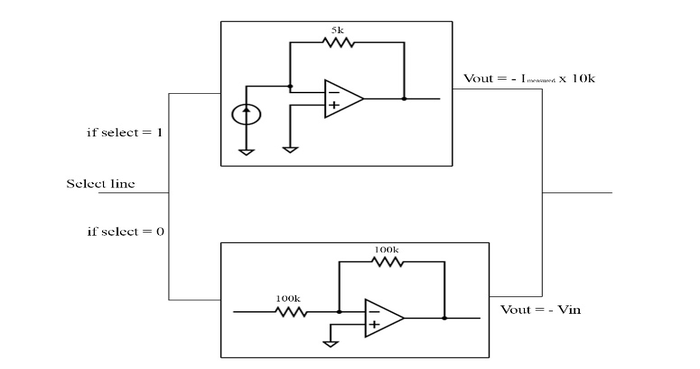
</image>

**Figure 7:** Block Diagram of Trans-Impedance Stage
</center>

Circuit level implementation details of the transimpedance stage are given in below Figure. All of the swithes in this design were implemented using transmission gates for rail to rail operation. The Op-Amp used in this design is also a rail to rail Op-Amp. When S1 is closed it will act as a current measurement stage and when S2 is closed the stage will act as a unity gain amplifier. Both S1 and S2 are non-overlapping signals. Only one of them will high at any instant.
<center>
<image>

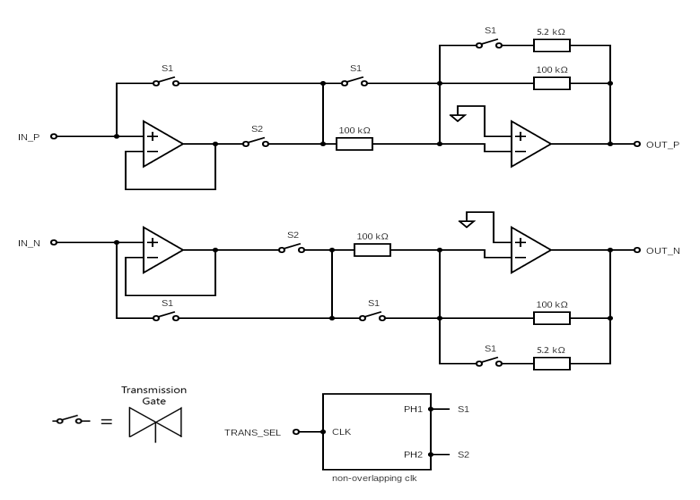
</image>

**Figure 8:** Implementation of Trans-Impedance Stage
</center>

The transimpedance stage has max current measurement capability of 300 &micro;A. The current measurement range can be increased by changing the value of resistance. Following is the testbench setup for measuring 100&micro;A differential current. In this schematic **in1** and **in2** are differential input currents and **out1** and **out2** are output differential voltages while **TRANS_SEL** is the select bit for current measurement.
<center>
<image>

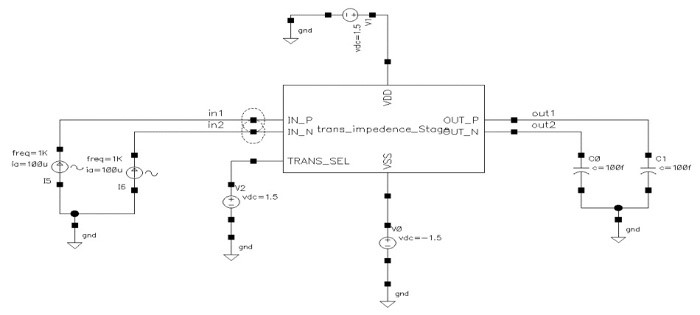
</image>

**Figure 9:** Schematic of Testbench Setup for Current Measurement

<image>

</center>

<center>
<image>

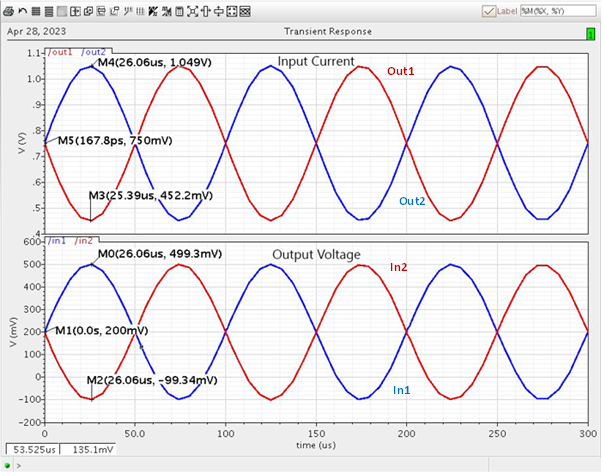
</image>

**Figure 10:** Simulation Results of Trans-Impedance Stage for Current Measurement
</center>

<center> 

**Table 3:** Current Measurement Stage Specifications  
<table>

|Name|Value|
|:|:|
|Current Measurement range|5&micro; – 300&micro;A (for 5k)|
|BW @ 0.1dB flatness|6 MHz|

</table>
</center>

###**3. Programmable Gain Block**  
Programmable gain Amplifier (PGA) block uses the differential amplifier configuration to obtain the gain of 2, 4 and 8. The voltage divider is used to obtain the gain of 0.25 and 0.5. The basic configuration for differential amplifier is given in Figure 11 and output equation for gain is given in Figure 13. This configuration has advantage to provide twice the gain as compared to non-differential configuration for same values of R<sub>f</sub> and R<sub>1</sub> which will reduce the size of resistors in the layout [2]. The circuit diagram for PGA which was implemented in this design is given in Figure 12. A decoder is required to select the desired gain on the basis of 3 select bits provided by digital interface.
<center>
<image>

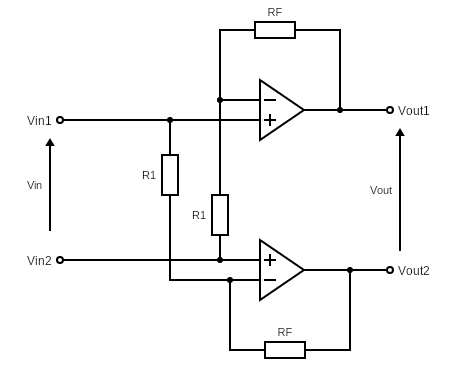
</image>

**Figure 11:** Circuit Diagram of Differential Amplifier
</center>

The equation for the calculation of differential gain for above circuit is given as follows.
<center>
$$ V_{out} =  (1 + \frac{R_F}{R_1})V_{in1} - (\frac{R_F}{R_1})V_{in2} - (1 + \frac{R_F}{R_1})V_{in2} +(\frac{R_F}{R_1})V_{in1} $$
$$ V_{out} = (1 + \frac{2R_F}{R_1})V_{in} $$
</center>
Where
<center>
$$ V_{in} = V_{in1} - V_{in2} $$
</center>
Figure 12 depicts the circuit diagram of the PGA, wherein the ideal switches are realized through the use of transmission gates. A Rail to Rail Output Op-Amp is employed in the design, which operates under a fully differential setup whereby the input and output signals are represented as differential pairs.
<center>
<image>

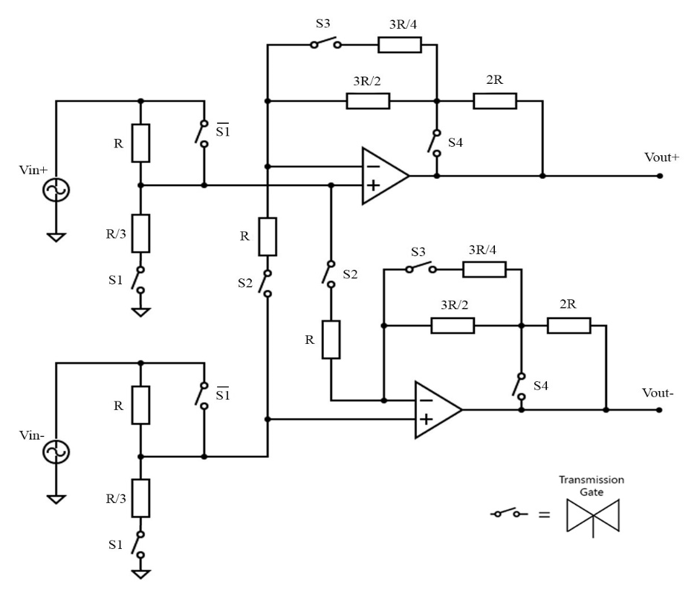
</image>

**Figure 12:** Circuit Diagram of PGA
</center>

The gain selection for the PGA is given in the Table 3. In this table **A**, **B** and **C** are selection bits from digital interface and S<sub>1</sub>, S<sub>2</sub>, S<sub>3</sub> and S<sub>4</sub> are the switches. A decoder was designed to implement correct swiching sequence based on digital bits to select the desired gain. The testbench schematic of PGA is shown in Figure 13.

<center>

**Table 4:** Gain Selection

<table>

|A|B|C|Gain|S1|S2|S3|S4|
|:|:|:|:--:|:|:|:|:|
|0|0|0|0.25|1|0|1|1|
|0|0|1|0.25|1|0|1|1|
|0|1|0|0.25|1|0|1|1|
|0|1|1|0.5|1|1|1|1|
|1|0|0|1|0|0|1|1|
|1|0|1|2|0|1|1|1|
|1|1|0|4|0|1|0|1|
|1|1|1|8|0|1|0|0|

</table>

</image>

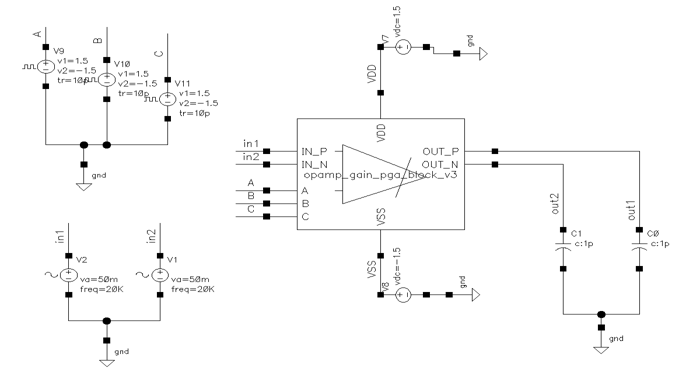
</image>

**Figure 13:** Testbench Schematic of PGA <br>
</center>

Figure 13 shows the simulation results of PGA. The waveforms at the right side are selection bits for programmable gain and on the left input and output of PGA are shown red and blue respectively. 
<center>
<image>

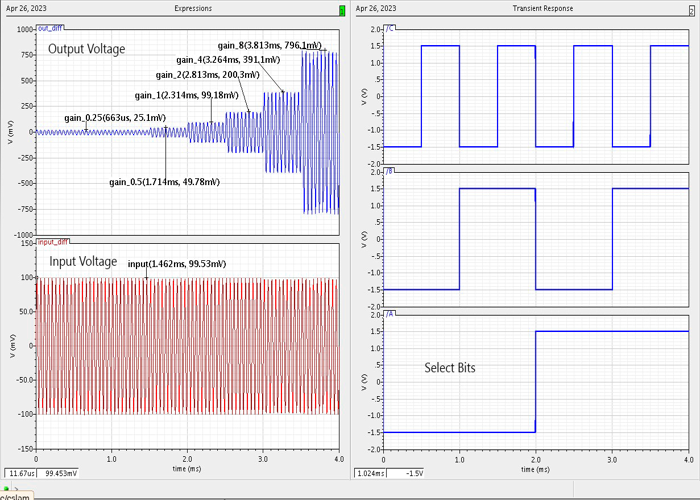
</image>

**Figure 14:** Simulation Results of PGA
</center>


<center>

**Table 5:** Programmable Gain Stage Features

<table>

|Name|Value|
|:|:|
|Selectable Gain|0.25, 0.5, 1, 2, 4, 8|
|BW @ 0.1dB flatness (G=1)|3.5 MHz|
|BW @ 0.5dB flatness (G=1)|7.963 MHz|
|BW @ 0.1dB flatness (G=8)|1.22 MHz|
|BW @ 0.5dB flatness (G=8)|2.59 MHz|
|GBW (G=8)|66.45 MHz|
|Phase Margin (G=8)|54º|

</table>
</center>

###**4. ADC Driver Block**  
This block is required to provide the driving strength to differential inputs of ADC. Differential amplifiers offer a good solution to drive differential inputs of the ADC [3]. It also has the ability to adjust the output common mode voltage (V<sub>ocm</sub>). This was required in Analog Discovery as ADC used has single supply (0-1.8V) so, V<sub>ocm</sub> of 0.9V is provided to the output. For this design, ADC voltage was assumed to be 0-1.5V so, V<sub>ocm</sub> of 0.75V is provided to the output. No voltage protection mechanism was implemented to limit the voltage swing to 0-1.5V in this design. Protection mechanism will be added in the future versions of the design. Figure 15 depicts the ADC driver block.

<center>
<image>

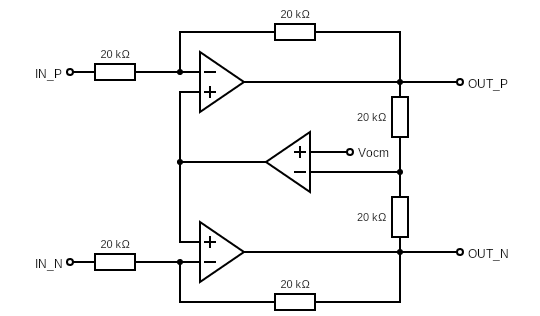
</image>

**Figure 15:** ADC Diriver Circuit Diagram <br>
</center>

Figure 16 and Fgure 17 shows the testbench setup and simulation results of ADC Driver stage respectively. This stage provides driving strength and adjusts output common mode voltage. 
<center>
<image>

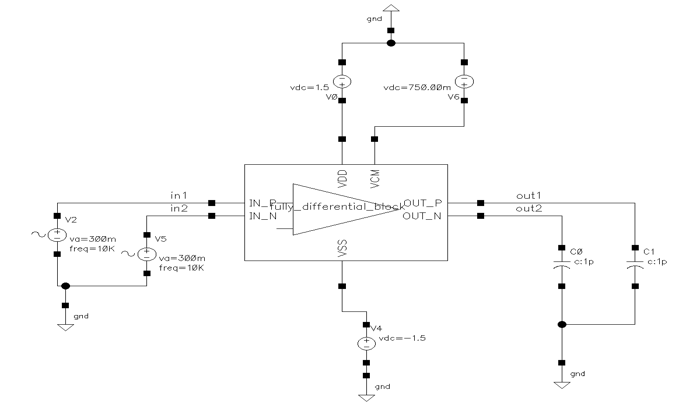
</image>

**Figure 16:** Testbench Setup for ADC Driver <br>
</center>

<center>
<image>

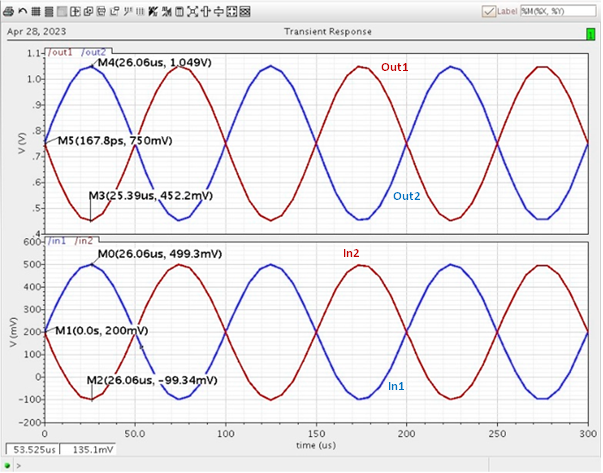
</image>

**Figure 17:** Simulation Results of ADC Driver
</center>

Input sine wave with V<sub>p</sub> of 300mV was provided with 200mV offset and Output common mode came to be 750mV as provided in testbench with same V<sub>p</sub> of 300mV. 
<center>

**Table 6:** ADC Driver Stage features
<table>

|Name|Value|
|:|:|
|BW @ 0.1dB flatness (G=1)|10.1 MHz|
|Slew Rate @ CL = 1pF|76.31 V/&micro;s|

</table>
</center>

###**5. Folded Cascode Amplifier**
In this design a folded cascode operational amplifier (Op-Amp) was used which is a popular design that provides high gain, wide bandwidth, and excellent stability. This op-amp configuration consists of a folded cascode amplifier at the input stage and a common-source amplifier at the output stage. The folded cascode amplifier uses both p-type and n-type transistors to achieve high gain while maintaining a balanced output impedance [4]. Figure 18 shows the schematic of folded cascode amplifier used in this design. The common-source amplifier provides a low output impedance and a high output swing capability. The quality parameters of the opamp are measured and listed in Table 7. 

<center>


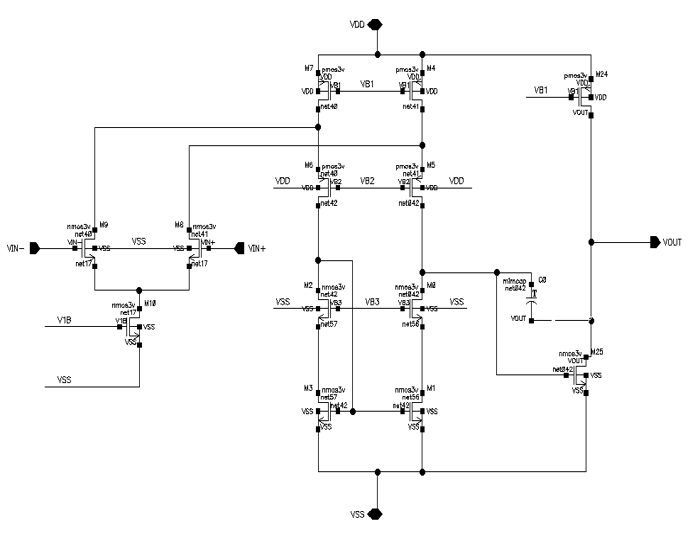

**Figure 18:** Schematic of Folded Cascode Amplifier <br>
</center>

The schematic of testbench of Folded Cascode Amplifier is shown in Figure 19. The amplifier was designed for a reference current of 40&micro;A. The Gain-Bandwidth plot along with phase margin is given in Figure 20 and Figure 21 shows the slew rate of Amplifier.

<center>
<image>

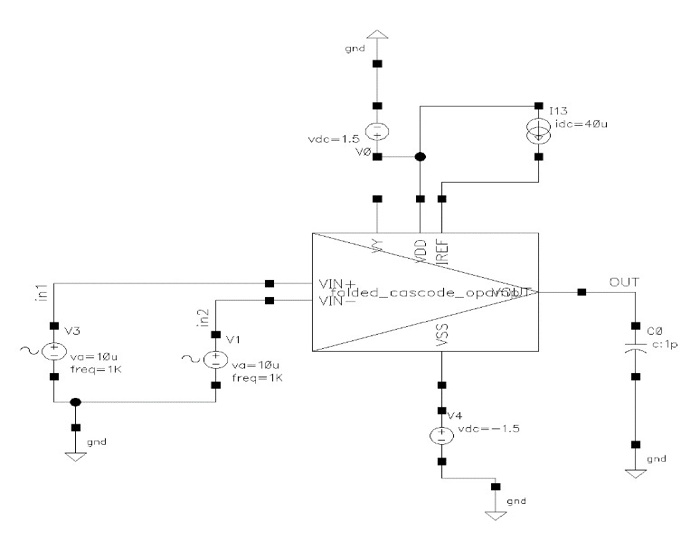
</image>

**Figure 19:** Testbench Schematic of Folded Cascode Amplifier
</center>

<center>
<image>

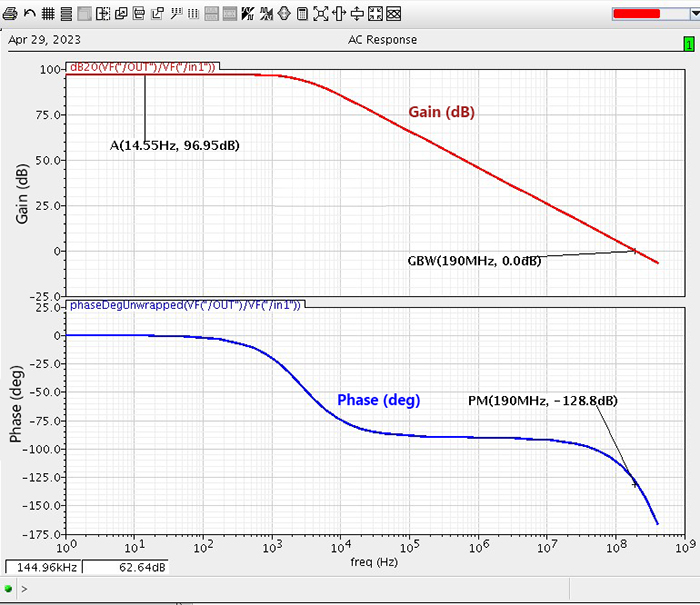
</image>

**Figure 20:** Frequency Response of Folded Cascode Amplifier
</center>

<center>
<image>

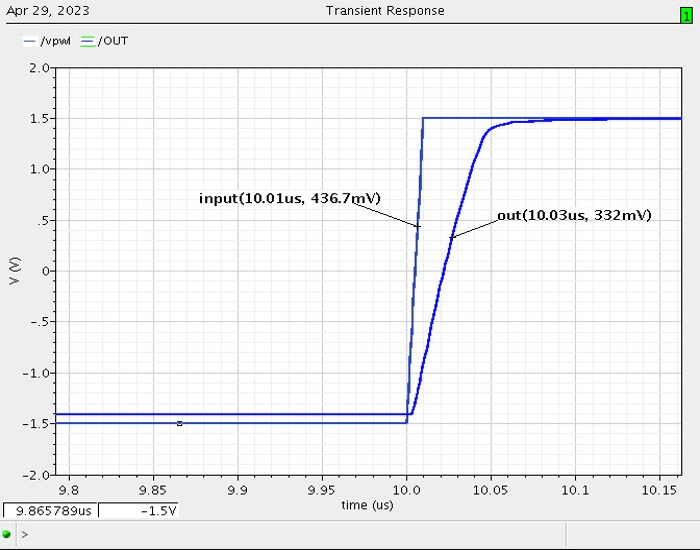
</image>

**Figure 21:** Slew Rate of Folded Cascode Amplifier
</center>

An input sweep of -1.5V to 1.5V was given, and the slew rate was calculated for the output, which turned out to be 68.74 V/&micro;s.

**CMRR:**

Common Mode Rejection Ratio (CMRR) is measured according to method given in [5]. Op-Amp was connected according to the configuration given in Figure 22 and V<sub>pp</sub> of input and output was measured. The equation given in [5] was used to find CMRR. The simulation results for the configuration in Figure 22 are given in Figure 23. The 1<sup>st</sup> waveform is input and 2<sup>nd</sup> waveform is output signal.

<center>
<image>

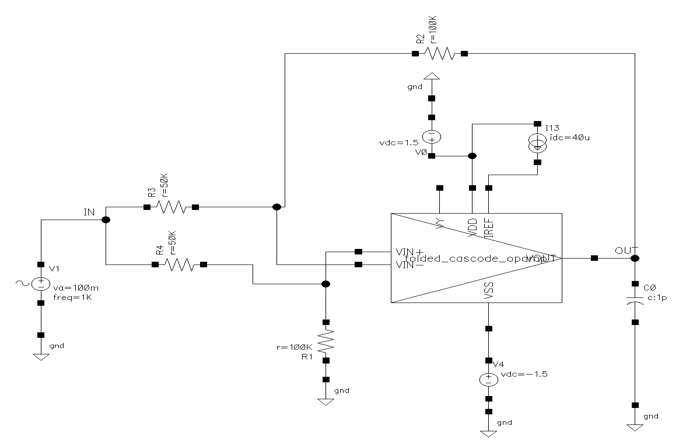
</image>

**Figure 22:** Testbench Setup for Calculation of CMRR of Folded Cascode Amplifier <br>
</center>

<center>
<image>

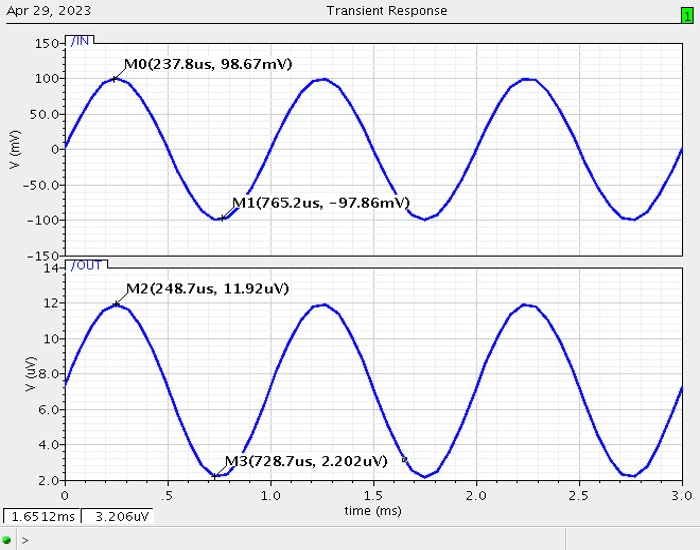
</image>

**Figure 23:** CMRR of Folded Cascode Amlifier 

</center>

<center>

$$ CMRR = \frac{{\Delta}V_{in}}{{\Delta}V_{out}}(1 + \frac{R_2}{R_1}) $$ <br>
$$ CMRR = \frac{200m}{9.718{\mu}}(1 + \frac{100k}{50k}) $$ <br>
$$ CMRR  = 61741.1 $$ <br>
$$ CMRR (dB) = 95.8dB $$ <br>

**Table 7:** Folded Cascode Amplifier Parameters
<table>

|Name|Value|
|:|:|
Gain|96.9 dB|
|Bandwidth|190 MHz|
|Phase Margin|51.1&deg;|
|Slew Rate|68.74 V/&micro;s|
|Power|2.72 mW|
|GBW (G=8)|66.45 MHz|
|CMRR|95.8 dB|

</table>
</center>

Corner simulation results of folded cascode amplifier are given in Figure 24. The lowest bandwidth at SS corner is 158MHz at gain of 100dB. The highest bandwidth at FF corner is 230MHz at gain of 94.8dB. The highest and lowest phase margin is 53.5&deg; and 47&deg; respectively. 
<center>
<image>

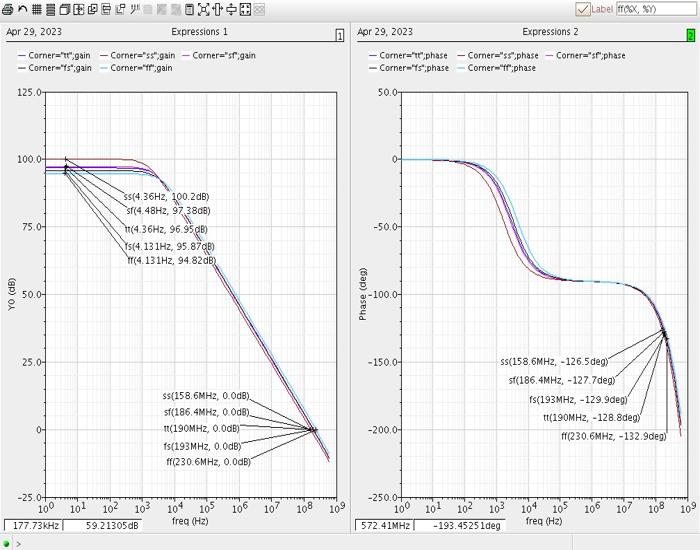
</image>

**Figure 24:** Corner Simulation of Folded Cascode Amplifier
</center>

###**6. Complete Design Simulation**
Testbench setup for complete simulation is given in Figure 25. A total of three test signals were simulated. The 1<sup>st</sup> signal was 50mV<sub>p</sub> sine wave, the 2<sup>nd</sup> was 100mV<sub>p</sub> sine wave and the 3<sup>rd</sup> was 150&micro;A sinusoidal current signals. The complete test setup information is given in table 8, 9 and 10 respectively.
<center>
<image>

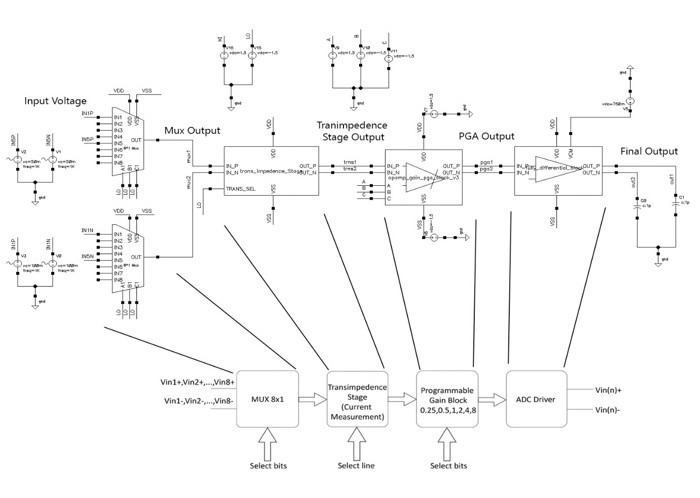
</image>

**Figure 25:** Testbench Setup of Complete Design
</center>

<center>

**Table 8:** Testbench Setup1

<table>

||
|:|:|
|Input Sine Wave Vp|50m V |
|Mux channel select|0 (b<sub>2</sub>=0, b<sub>1</sub>=0, b<sub>0</sub>=0)|
|Transimpedance select bit|0|
|Gain select|8 (b<sub>2</sub>=1, b<sub>1</sub>=1, b<sub>0</sub>=1)|
|Output common mode|0.75V|

</table>
</center><br>
In this test setup, a sine wave of 50mV<sub>p</sub> was applied at channel 1 of MUX with gain selection of PGA set at G = 8 and transimpedance select was equal to zero because current measurement was not required at this moment. The output common mode was set at 750mV at ADC driver stage. The simulation of this test setup is shown in Figure 26.
<center>
<image>

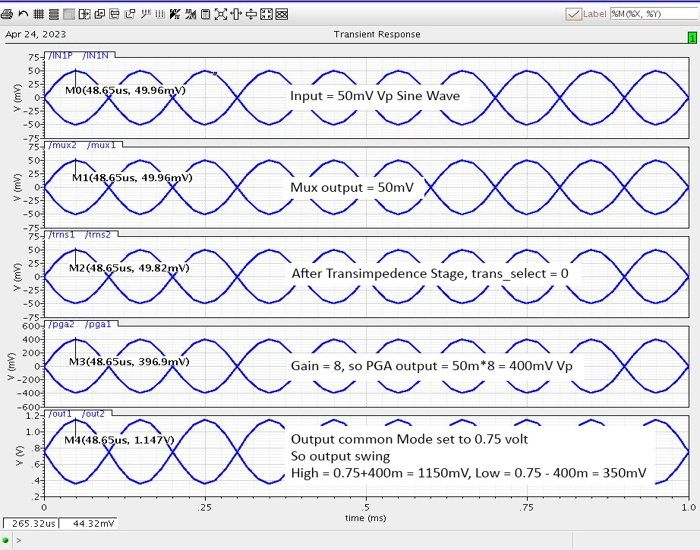
</image>

**Figure 26:** Simulation of Complete Design for 50mV<sub>p</sub> Sinusoidal Input
</center>

<center>


**Table 9:** Testbench Setup2 
<table>

||
|:|:|
|Input Sine Wave Vp|100m V |
|Mux channel select|0 (b<sub>2</sub>=0, b<sub>1</sub>=0, b<sub>0</sub>=0)|
|Transimpedance select bit|0|
|Gain select|0.25 (b<sub>2</sub>=0, b<sub>1</sub>=0, b<sub>0</sub>=1)|
|Output common mode|0.75V|

</table>
</center><br>
In this test setup a sine wave of 100mV<sub>p</sub> was applied at channel 1 of MUX with gain selection of PGA set at G = 0.25 and transimpedance select was equal to zero because current measurement was not required at this moment. The output common mode was set at 750mV at ADC driver stage. The simulation of this test setup is shown in Figure 27.
<center>
<image>

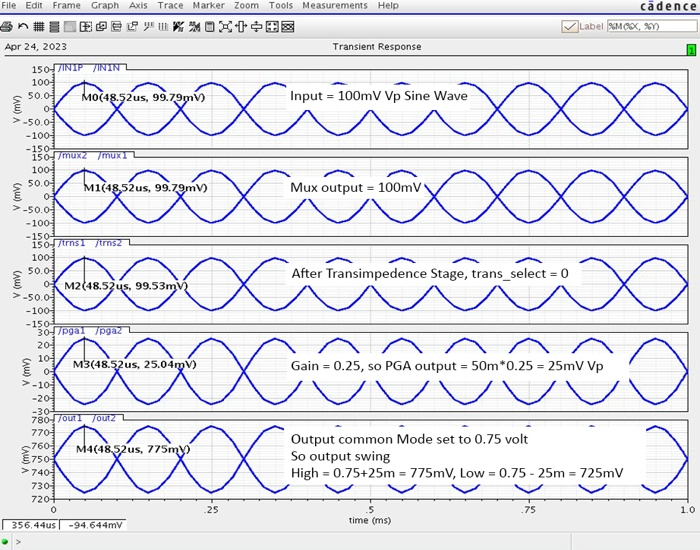
</image>

**Figure 27:** Simulation Results of Complete Design for 100mV<sub>p</sub> Sinusoidal Signal
</center>

<center>

**Table 10:** Testbench  Setup3
<table>

||
|:|:|
|Input Sine Wave I<sub>p</sub>|150&micro;A |
|Mux channel select|1 (b<sub>2</sub>=0, b<sub>1</sub>=0, b<sub>0</sub>=1)
|Transimpedance select bit|1|
|Gain select|1 (b<sub>2</sub>=1, b<sub>1</sub>=0, b<sub>0</sub>=0)
|Output common mode|0.75V|

</table>
</center><br>
In this test setup, a sine wave of 150&micro;A was applied at channel 1 of MUX with gain selection of PGA set at G = 1 and transimpedance select was equal to 1 because current measurement was being measured at this moment. The output common mode was set at 750mV at ADC driver stage. The results of this test setup are shown in Figure 28.
<center>
<image>

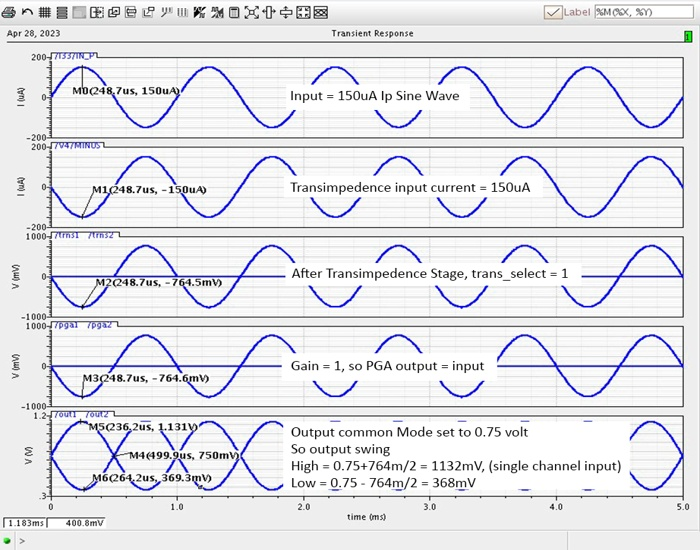
</image>

**Figure 28:** Simulation Results of Complete Design for Current Measurement
</center>

Test Setup: V<sub>S</sub> = ±1.5V
<center>

**Table 11:** Complete Input Mux Block Features  
<table>

|Name|Value|
|:|:|
|Selectable Gain|0.25, 0.5, 1, 2, 4, 8 |
|BW @ 0.1dB flatness (G=1)|3.147 MHz|
|BW @ 0.5dB flatness (G=1)|6.52 MHz|
|BW @ 0.1dB flatness (G=8)|0.792 MHz|
|BW @ 0.5dB flatness (G=8)|1.82 MHz|  

<br>
</table>
</center>

**Corner Simulation:**

Corner simulation was performed for Gain = 8. Bandwidth for 0.5dB flatness point was observed and is shown in Figure 29.
<center>

**Table 12:** Corner Simulation Results for Complete Design @ Gain = 8  
<table>

|Corner|Bandwidth @ 0.5dB|
|:|:|
|SS (worst)|1.719 MHz |
|SF|1.803 MHz|
|TT|1.82 MHz|
|FS|1.834 MHz|
|FF (best)|1.911 MHz|  

</table>
<image>

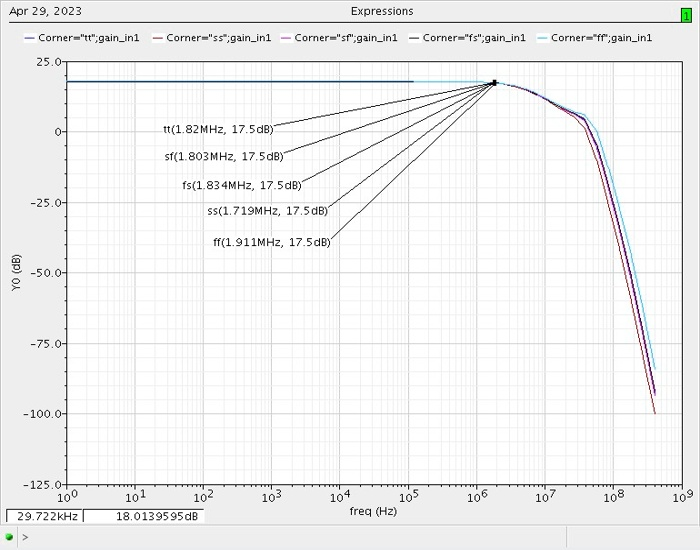
</image>

**Figure 29:** Corner Simulation Results for Complete Design
</center>




###**7. Xschem Simulations**
Figure 30 depicts the implementation of ADC driver stage using Open Source tool Xschem. YTransient Analysis was also performed to familiarize with OS Tools.<br>
<center>
<image>

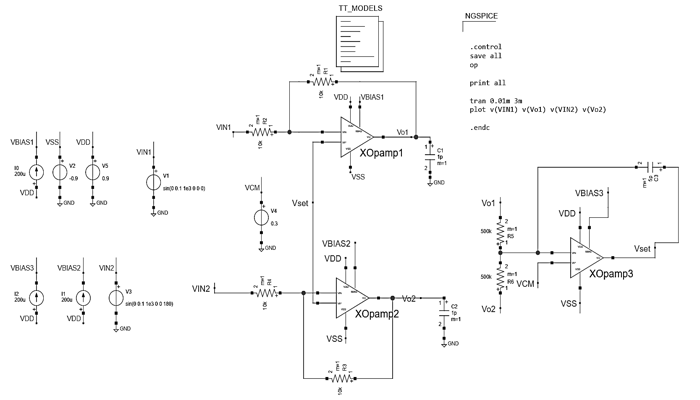
</image>

**Figure 30:** ADC Driver Block Testbench in Xschem
</center>

<center>
<image>

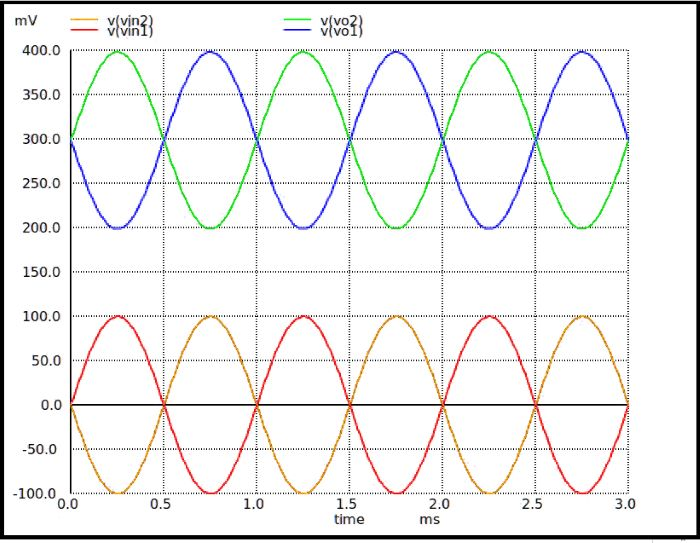
</image>

**Figure 31:** Simulation Results of ADC Driver at Open Source Tools
</center>

###**Conclusion**<br>
This proposal presents a design for the input scope multiplexer and signal conditioning block, which is an integral component of the Analog Discovery and a target of the PICO design contest. The proposed design has been implemented on the TSMC 130nm process node using the Cadence toolset, and one of the blocks has also been implemented on Xschem. The proposed design satisfies all the requirements of the targeted block, including bandwidth, gain, and noise, which have been verified on the TSMC 130nm PDK. The Proposed design provides a comprehensive solution for the scope multiplexer and signal conditioning block.

###**References**
[1] VLSI Encyclopedia, "Switch-level design of 2x1 Multiplexer," 10-Oct-2011. [Online]. Available: https://www.vlsiencyclopedia.com/2011/10/switch-level-design-of-2x1-multiplexer.html. [Accessed: 01-May-2023]. <br>
[2] W. G. Jung, "Op Amp Applications," Analog Devices, 2002, ISBN 0-916550-26-5. Also available as Op Amp Applications Handbook, Elsevier/Newnes, 2005, ISBN 0-7506-7844-5, Chapter 3. <br>
[3] Analog Devices Inc. (2002, April). High Speed Amplifier Techniques [Online]. Available: https://www.analog.com/media/cn/training-seminars/tutorials/MT-075.pdf. [Accessed: May 2, 2023]. <br>
[4] H. Daoud, S. Ben Salem, S. Zouari, and M. Loulou, "Folded cascode OTA design for wide band applications," in International Conference on Design and Test of Integrated Systems in Nanoscale Technology, 2006. DTIS 2006., Tunis, Tunisia, 2006, pp. 437-440, doi: 10.1109/DTIS.2006.1708674. <br>
[5] Analog Devices. (2016, October). Tutorial MT-042: Power Supply Considerations for High-Speed ADCs. [Online]. Available: https://www.analog.com/media/en/training-seminars/tutorials/MT-042.pdf

